In [ ]:
!pip install gradio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.5 MB/s eta 0:00:00


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

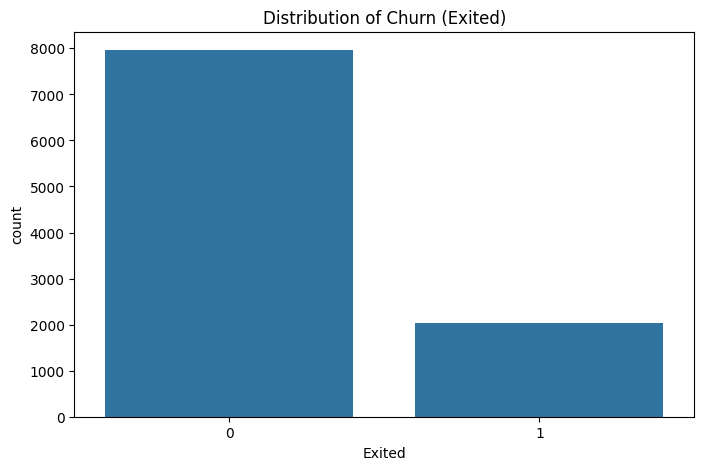

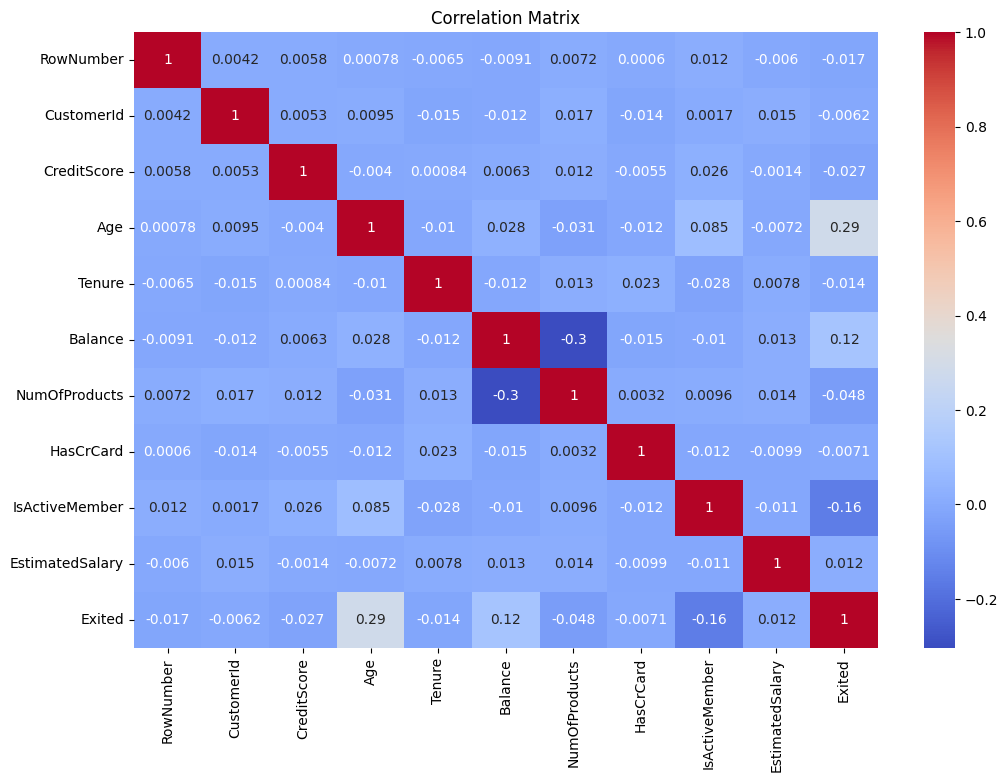


Model Evaluation:
Accuracy: 0.8645

Confusion Matrix:
[[1545   62]
 [ 209  184]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.58       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000


Feature Importance:
           Feature  Importance
3              Age    0.240453
9  EstimatedSalary    0.148004
0      CreditScore    0.142369
5          Balance    0.138670
6    NumOfProducts    0.132061
4           Tenure    0.080932
8   IsActiveMember    0.042807
1        Geography    0.037402
2           Gender    0.019032
7        HasCrCard    0.018269
It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` 

In [ ]:
# Load the Dataset
import pandas as pd

# Read the dataset
df = pd.read_csv('Churn_Modelling.csv')

# Data Exploration
# Display first few rows
print(df.head())

# Shape of the dataset
print("\nShape:", df.shape)

# Column names
print("\nColumns:", df.columns.tolist())

# Data types and non-null values
print("\nData types and non-null values:")
print(df.info())

# Summary statistics for numeric features
print("\nSummary statistics:")
print(df.describe())

# Check for Missing Values and Duplicates
print("\nMissing values:")
print(df.isnull().sum())

print("\nDuplicate rows:", df.duplicated().sum())

# Visualize the Data
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution of the target variable (Exited)
plt.figure(figsize=(8, 5))
sns.countplot(x='Exited', data=df)
plt.title('Distribution of Churn (Exited)')
plt.show()

# Correlation matrix
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Preprocess the Data
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# Drop unnecessary columns
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

# Encode categorical variables
label_encoder = LabelEncoder()
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['Geography'] = label_encoder.fit_transform(df['Geography'])

# Define features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build and Evaluate a Model
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Initialize and train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = model.predict(X_test_scaled)

# Evaluate the model
print("\nModel Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)

# Create a Prediction Function
def predict_churn(CreditScore, Geography, Gender, Age, Tenure,
                 Balance, NumOfProducts, HasCrCard, IsActiveMember,
                 EstimatedSalary):
    # Create input dictionary
    input_data = {
        'CreditScore': CreditScore,
        'Geography': Geography,
        'Gender': Gender,
        'Age': Age,
        'Tenure': Tenure,
        'Balance': Balance,
        'NumOfProducts': NumOfProducts,
        'HasCrCard': HasCrCard,
        'IsActiveMember': IsActiveMember,
        'EstimatedSalary': EstimatedSalary
    }

    # Convert to DataFrame
    input_df = pd.DataFrame([input_data])

    # Encode categorical variables
    input_df['Gender'] = label_encoder.transform(input_df['Gender'])
    input_df['Geography'] = label_encoder.transform(input_df['Geography'])

    # Scale the features
    input_scaled = scaler.transform(input_df)

    # Make prediction
    prediction = model.predict(input_scaled)[0]
    probability = model.predict_proba(input_scaled)[0][1]

    return "Churn" if prediction == 1 else "No Churn", f"{probability:.2%} probability of churn"

# Create a Gradio Interface
import gradio as gr

inputs = [
    gr.Number(label="Credit Score"),
    gr.Dropdown(['France', 'Spain', 'Germany'], label="Country"),
    gr.Dropdown(['Male', 'Female'], label="Gender"),
    gr.Number(label="Age"),
    gr.Number(label="Tenure (years with bank)"),
    gr.Number(label="Balance"),
    gr.Number(label="Number of Products"),
    gr.Dropdown([0, 1], label="Has Credit Card (0=No, 1=Yes)"),
    gr.Dropdown([0, 1], label="Is Active Member (0=No, 1=Yes)"),
    gr.Number(label="Estimated Salary")
]

outputs = [
    gr.Textbox(label="Prediction"),
    gr.Textbox(label="Probability")
]

gr.Interface(
    fn=predict_churn,
    inputs=inputs,
    outputs=outputs,
    title="🏦 Customer Churn Prediction",
    description="Predict whether a customer will churn (leave the bank) based on their characteristics."
).launch()